# Analysis of taxi rides in New York City

In this notebook, we will analyse a dataset about the taxi rides taken in New York City. We will be analysing some trends over the course of x months and then see if the weather has any impact on the rides using a weather API.

# Loading packages

We will need to load some of the important packages at the beginning.
The two that we will need for sure are pandas (pd) and numpy (np).

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Load the data

We are loading 3 number of months that will add up to more than 1 million rows. Through filtering and merging, we will reach the 1 million rows limit. However, sincee we are looking at trends, we will create one graph to see change over time.

In [3]:
march = pd.read_csv('Data/yellow_tripdata_2020_03.csv', low_memory=False)
april = pd.read_csv('Data/yellow_tripdata_2020_04.csv', low_memory=False)
may = pd.read_csv('Data/yellow_tripdata_2020_05.csv', low_memory=False)

 We are merging all the tables together to create one table for whole spring.

In [6]:
spring = march.append(april).append(may)

In [7]:
spring.count()

VendorID                 3477765
tpep_pickup_datetime     3593656
tpep_dropoff_datetime    3593656
passenger_count          3477765
trip_distance            3593656
RatecodeID               3477765
store_and_fwd_flag       3477765
PULocationID             3593656
DOLocationID             3593656
payment_type             3477765
fare_amount              3593656
extra                    3593656
mta_tax                  3593656
tip_amount               3593656
tolls_amount             3593656
improvement_surcharge    3593656
total_amount             3593656
congestion_surcharge     3593656
dtype: int64

This combined dataset has too many rows but there seems to be some mismatching so we can do some cleaning and filtering.

### Cleaning of full data

In [8]:
spring.dropna(inplace=True)


In [9]:
spring['tpep_pickup_datetime'] = pd.to_datetime(spring['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M')
spring['tpep_dropoff_datetime'] = pd.to_datetime(spring['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M')

In [10]:
spring['pickup_date'] = spring['tpep_pickup_datetime'].dt.date

In [11]:
spring_grouped = spring.groupby('pickup_date').size().reset_index()
spring_grouped.columns=['pickup_date', 'nb_trips']

<AxesSubplot:xlabel='pickup_date', ylabel='nb_trips'>

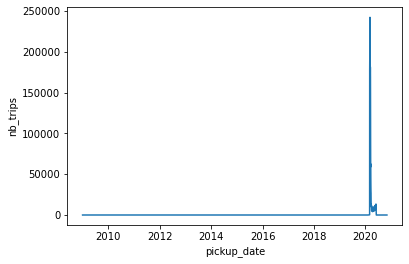

In [12]:
sns.lineplot(data = spring_grouped, x = 'pickup_date', y = 'nb_trips')

In [13]:
march.count()

VendorID                 2969805
tpep_pickup_datetime     3007292
tpep_dropoff_datetime    3007292
passenger_count          2969805
trip_distance            3007292
RatecodeID               2969805
store_and_fwd_flag       2969805
PULocationID             3007292
DOLocationID             3007292
payment_type             2969805
fare_amount              3007292
extra                    3007292
mta_tax                  3007292
tip_amount               3007292
tolls_amount             3007292
improvement_surcharge    3007292
total_amount             3007292
congestion_surcharge     3007292
dtype: int64

In [54]:
april.count()

VendorID                 218480
tpep_pickup_datetime     237993
tpep_dropoff_datetime    237993
passenger_count          218480
trip_distance            237993
RatecodeID               218480
store_and_fwd_flag       218480
PULocationID             237993
DOLocationID             237993
payment_type             218480
fare_amount              237993
extra                    237993
mta_tax                  237993
tip_amount               237993
tolls_amount             237993
improvement_surcharge    237993
total_amount             237993
congestion_surcharge     237993
dtype: int64

Looks like there is a discapancy in the data in April, since there are signifcantly less observations in this month with almost the same number of days. We can see this in the graoh but also the actual counts. This is probably due to the shutdown in NYC due to COVID reaching the US. Therefore, we will not use months after March for analysis since it does not show the normal movement of people.

Looks like there are some columns that have NA values or somehow shorted, so we will filter those out first. After that we will filter the data by vendor ID and use just 1 so that we can include more variaty in the date (as in more time).

In [14]:
march.dropna(inplace=True)

In [15]:
march = march[march['VendorID'] == 1]

In [16]:
march = march.reset_index()
march = march.drop('index', axis = 1)

In [17]:
march.count()

VendorID                 988227
tpep_pickup_datetime     988227
tpep_dropoff_datetime    988227
passenger_count          988227
trip_distance            988227
RatecodeID               988227
store_and_fwd_flag       988227
PULocationID             988227
DOLocationID             988227
payment_type             988227
fare_amount              988227
extra                    988227
mta_tax                  988227
tip_amount               988227
tolls_amount             988227
improvement_surcharge    988227
total_amount             988227
congestion_surcharge     988227
dtype: int64

With these filterings we managed to bring down the cound of the observations to under 1 million, which we can use now for analysis.

## Data cleaning of only March

Now that we have the data that we will work with, we can look into what is needed in terms of data cleaning.

In [18]:
march

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.7,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.1,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
2,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.4,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5
3,1.0,2020-03-01 00:04:43,2020-03-01 00:23:17,1.0,3.5,1.0,Y,113,142,1.0,15.0,3.0,0.5,3.75,0.0,0.3,22.55,2.5
4,1.0,2020-03-01 00:43:21,2020-03-01 01:14:36,1.0,14.1,1.0,Y,237,14,1.0,40.5,3.0,0.5,8.85,0.0,0.3,53.15,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988222,1.0,2020-03-31 23:40:38,2020-03-31 23:55:53,1.0,5.9,1.0,N,127,43,2.0,19.5,0.5,0.5,0.00,0.0,0.3,20.80,0.0
988223,1.0,2020-03-31 23:31:30,2020-03-31 23:35:22,0.0,0.8,1.0,Y,263,237,1.0,5.0,3.0,0.5,2.60,0.0,0.3,11.40,2.5
988224,1.0,2020-03-31 23:07:38,2020-03-31 23:19:20,1.0,4.3,1.0,N,113,236,1.0,14.5,3.0,0.5,2.70,0.0,0.3,21.00,2.5
988225,1.0,2020-03-31 23:38:47,2020-03-31 23:44:58,1.0,1.7,1.0,N,68,142,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5


In [19]:
march.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Looks like the one thing we need to change is the datetime columns. They should be transformed into actual datetime instead of objects.
We can also change the store_and_fwd_flag, payment_type,pickup and dropoff locations into a categorical since they are factors.

In [20]:
march['tpep_pickup_datetime'] = pd.to_datetime(march['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M')
march['tpep_dropoff_datetime'] = pd.to_datetime(march['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M')

In [21]:
march['store_and_fwd_flag'] = march.store_and_fwd_flag.astype('category')
march['payment_type'] = march.payment_type.astype('category')
march['PULocationID'] = march.PULocationID.astype('category')
march['DOLocationID'] = march.DOLocationID.astype('category')
march['RatecodeID'] = march.RatecodeID.astype('category')

In [22]:
march['VendorID'] = march.VendorID.astype('int')
march['passenger_count'] = march.passenger_count.astype('int')

In [23]:
march.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                   category
DOLocationID                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [24]:
march

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1,4.7,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1,1.1,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
2,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0,4.4,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5
3,1,2020-03-01 00:04:43,2020-03-01 00:23:17,1,3.5,1.0,Y,113,142,1.0,15.0,3.0,0.5,3.75,0.0,0.3,22.55,2.5
4,1,2020-03-01 00:43:21,2020-03-01 01:14:36,1,14.1,1.0,Y,237,14,1.0,40.5,3.0,0.5,8.85,0.0,0.3,53.15,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988222,1,2020-03-31 23:40:38,2020-03-31 23:55:53,1,5.9,1.0,N,127,43,2.0,19.5,0.5,0.5,0.00,0.0,0.3,20.80,0.0
988223,1,2020-03-31 23:31:30,2020-03-31 23:35:22,0,0.8,1.0,Y,263,237,1.0,5.0,3.0,0.5,2.60,0.0,0.3,11.40,2.5
988224,1,2020-03-31 23:07:38,2020-03-31 23:19:20,1,4.3,1.0,N,113,236,1.0,14.5,3.0,0.5,2.70,0.0,0.3,21.00,2.5
988225,1,2020-03-31 23:38:47,2020-03-31 23:44:58,1,1.7,1.0,N,68,142,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5


Now the data looks much more organized. Everything is in the correct format and now represents something meaningful. With this data, we can now do analysis.

## Analytics

### Question 1

Questions 1 will address the first point we would like to analyse. What kind of patterns can we find in the data?
Some of the things we are considering analysing are the number of trips over the day, a week, or a month. Average distribution of the total amount over these time windows. These data split by Rate type or type of payment.

#### Creating columns for anaylsis

To be able to analyse we first need to create some additional columns.
We will extract the hours, days, and days of the week from the date.
For this we will use the pickup time since that is more presentative when trying to analyse when people need taxis.

In [25]:
march['day'] = march['tpep_pickup_datetime'].dt.day
march['hour'] = march['tpep_pickup_datetime'].dt.hour
march['dayofweek'] = march['tpep_pickup_datetime'].dt.day_name()

#### Create dataframes for the different time increments

Now we can create dataframes for the hour, day and the weekdays. This will show us distributions that we can later graph.

In [26]:
march_by_hour = march.groupby('hour').size()
march_by_day = march.groupby('day').size()
march_by_dayofweek = march.groupby('dayofweek', sort = False).size()

<AxesSubplot:xlabel='hour'>

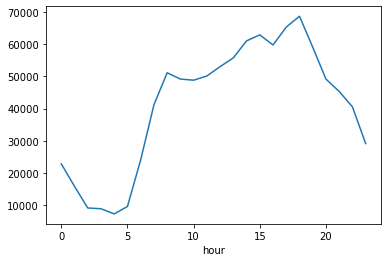

In [27]:
march_by_hour.plot()

<AxesSubplot:xlabel='day'>

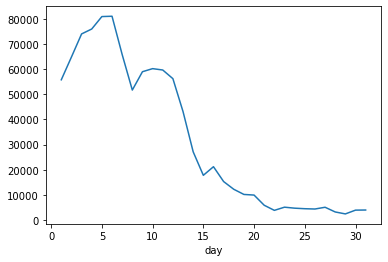

In [28]:
march_by_day.plot()

<AxesSubplot:xlabel='dayofweek'>

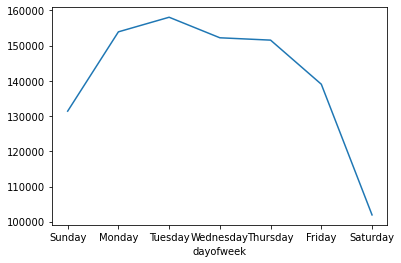

In [29]:
march_by_dayofweek.plot()

Looks like even March was affected by COVID already as you can see that the numbers drastically decreased around the 12th or the 13th. Maybe it would be better to include data from end of February and beginning March to be able to have fully unbiased data.
There other graphs show that there is something worth analysing here, so they will be looked at in further detail later on.

In [42]:
avg_fair_by_hour = march.groupby(['hour','passenger_count']).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()
avg_fair_by_day = march.groupby(['day','passenger_count']).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()
avg_fair_by_dayofweek = march.groupby(['dayofweek','passenger_count'], sort = False).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()

In [31]:
import math

avg_fair_by_hour['passenger_count'] = avg_fair_by_hour['passenger_count'].apply(lambda x: math.floor(x))
avg_fair_by_day['passenger_count'] = avg_fair_by_day['passenger_count'].apply(lambda x: math.floor(x))
avg_fair_by_dayofweek['passenger_count'] = avg_fair_by_dayofweek['passenger_count'].apply(lambda x: math.floor(x))

In [54]:
passenger = 3
avg_fair_by_hour[avg_fair_by_hour['passenger_count'] == passenger]

,hour,passenger_count,fare_amount,total_amount,trip_distance
3,0,3,11.959096,17.696838,2.887668
10,1,3,11.266006,16.861540,2.718902
17,2,3,11.954795,17.397507,2.998082
24,3,3,13.123711,18.948479,2.843041
31,4,3,14.638672,20.648359,3.839453
38,5,3,23.721250,30.549917,5.966667
45,6,3,19.416667,26.065147,5.189216
52,7,3,13.303329,18.980864,3.050992
59,8,3,12.615434,18.309528,2.808801
68,9,3,15.111700,21.088980,3.372238


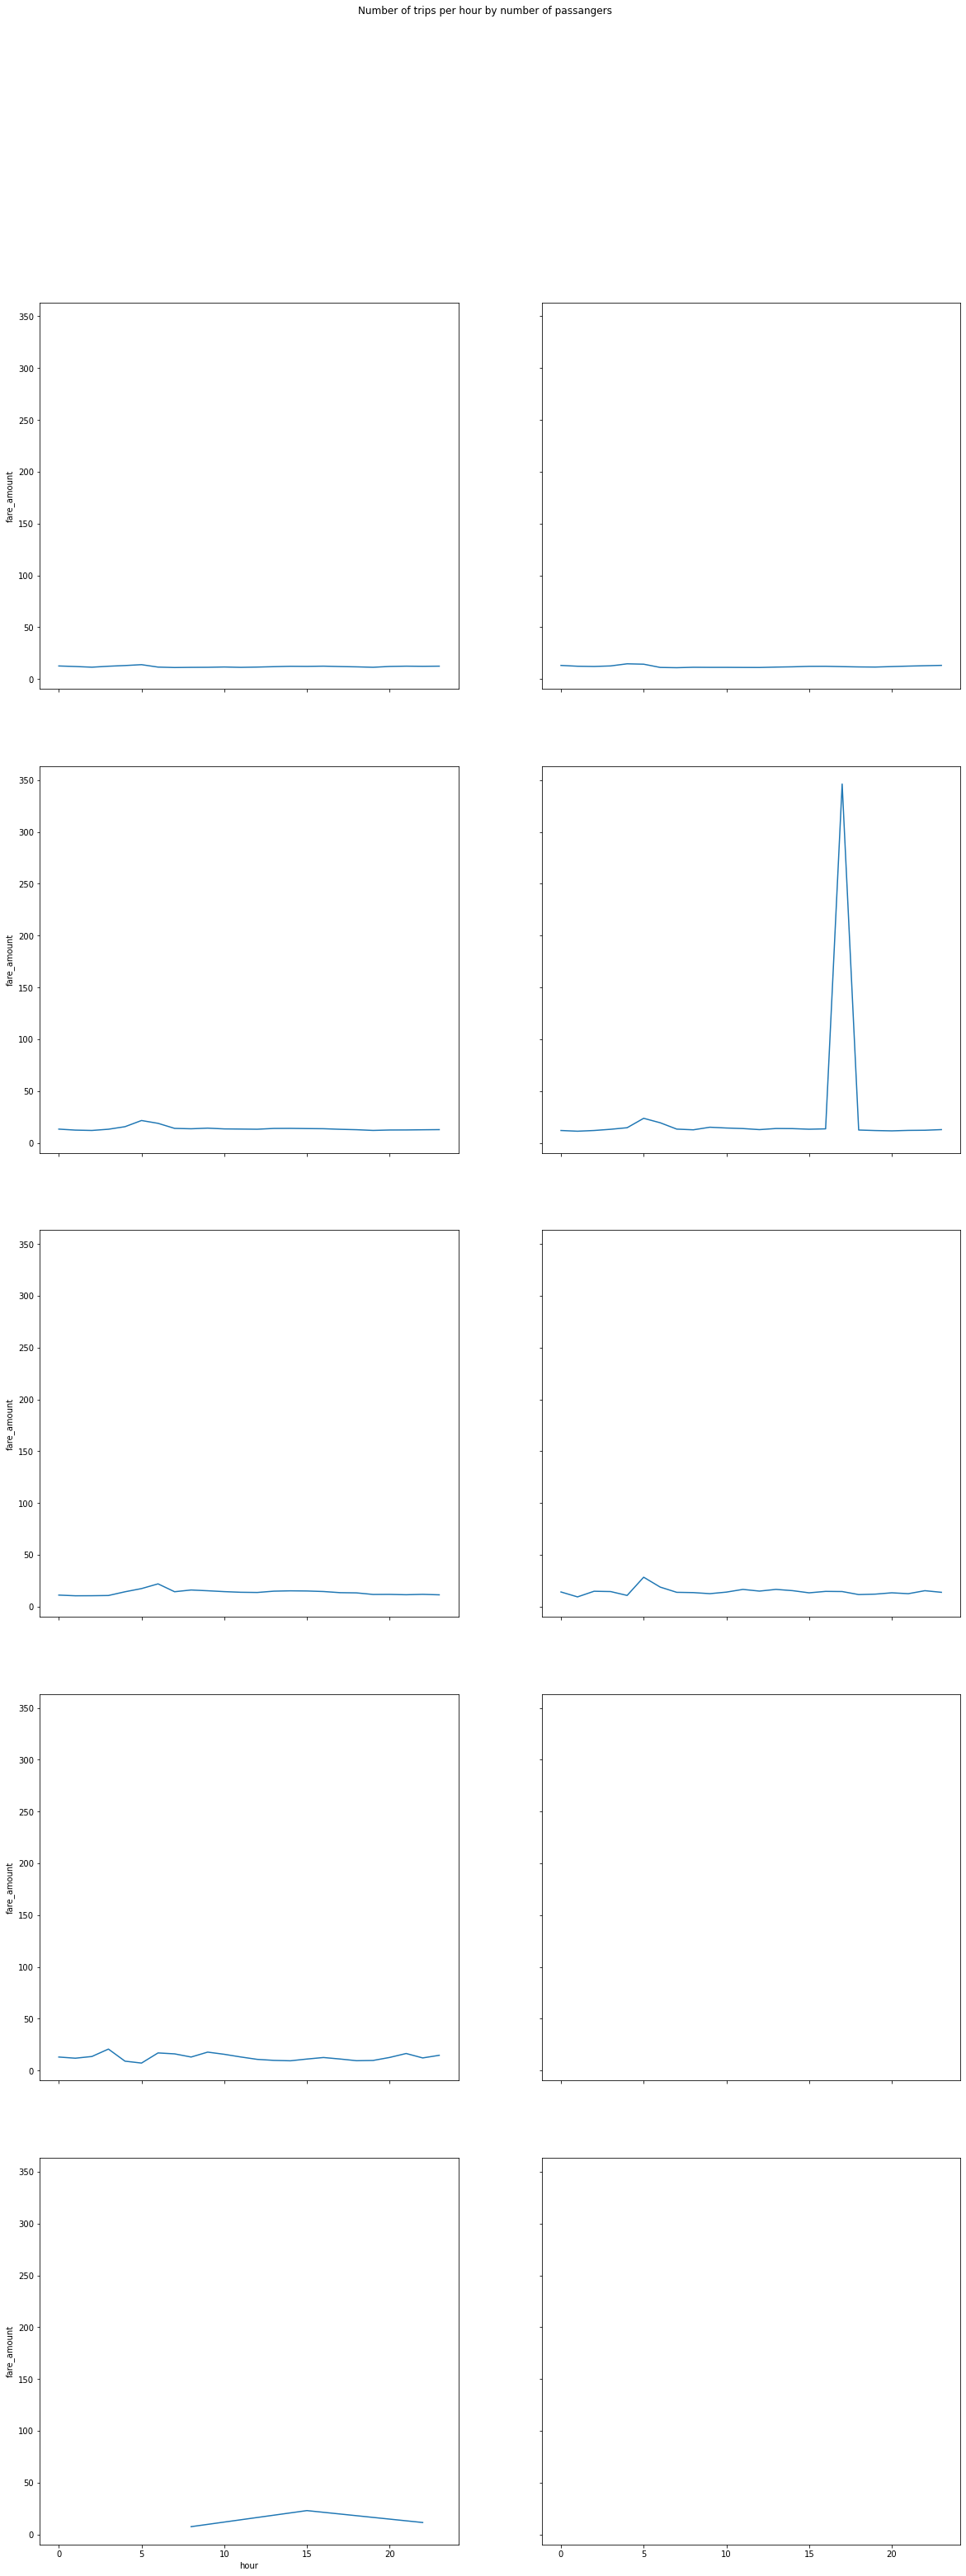

In [60]:
passenger_count = avg_fair_by_hour.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2+1, ncols=2, sharex = True, sharey = True,
                         figsize=(20,50))
fig.suptitle('Number of trips per hour by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_hour[avg_fair_by_hour['passenger_count'] == passenger],
                 x = 'hour', y = 'fare_amount', ax=axes[i//2, i%2],)
    i += 1
plt.show()

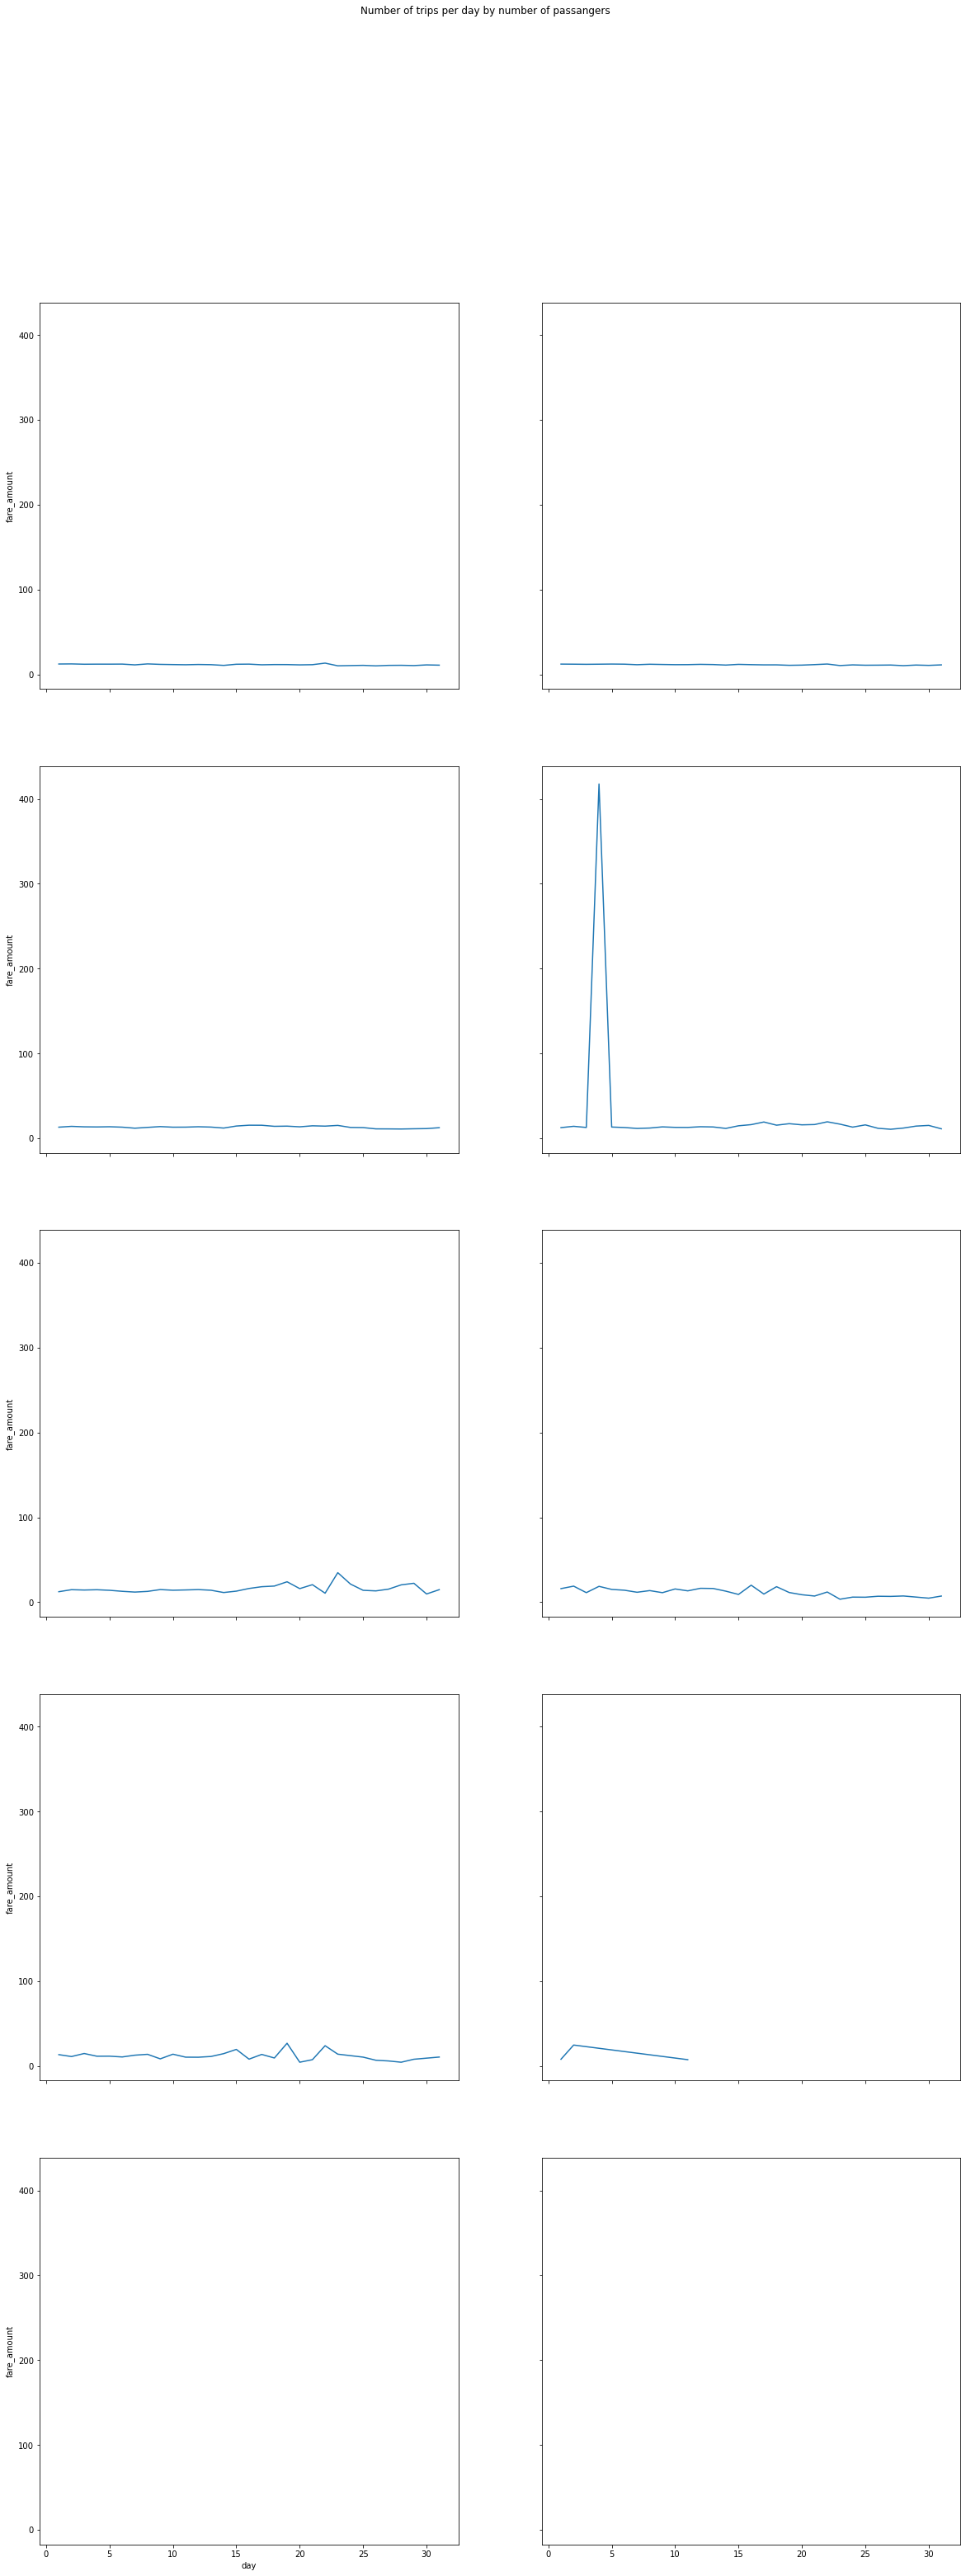

In [61]:
passenger_count = avg_fair_by_day.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2+1, ncols=2, sharex = True, sharey = True,
                         figsize=(20,50))
fig.suptitle('Number of trips per day by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_day[avg_fair_by_day['passenger_count'] == passenger],
                 x = 'day', y = 'fare_amount', ax=axes[i//2, i%2],)
    i += 1
plt.show()

<ipython-input-65-14499d8440d3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-65-14499d8440d3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-65-14499d8440d3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-65-14499d8440d3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-65-14499d8440d3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenge

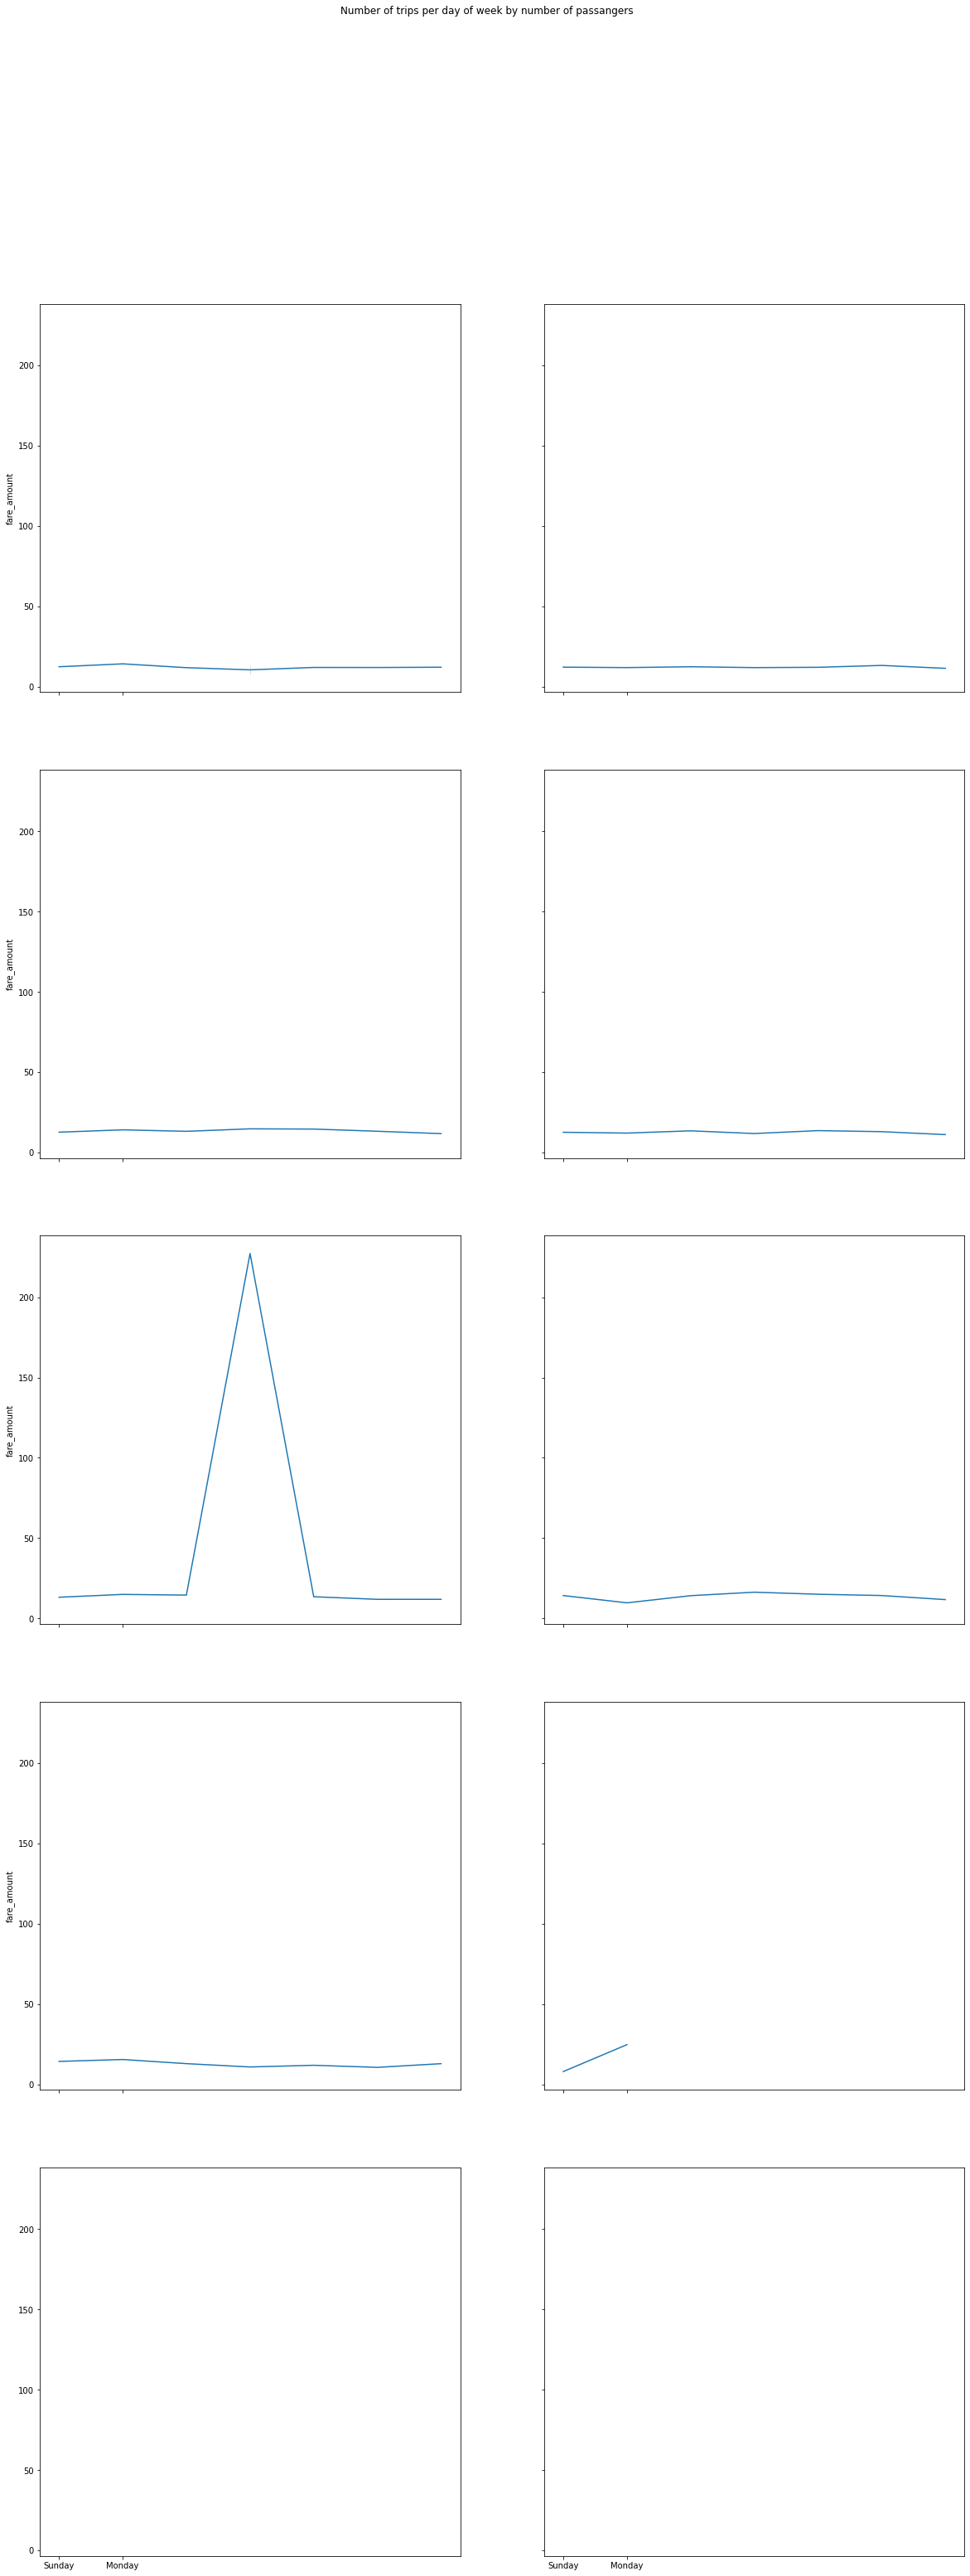

In [65]:
passenger_count = avg_fair_by_dayofweek.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2+1, ncols=2, sharex = True, sharey = True,
                         figsize=(20,50))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
                 x = 'dayofweek', y = 'fare_amount', ax=axes[i//2, i%2],)
    i += 1
plt.show()

#### Looking at different aspects

In [76]:
fare_type_vs_payment_type = march.groupby(['RatecodeID', 'payment_type']).size().reset_index()
fare_type_vs_payment_type.columns=['RatecodeID','payment_type','nb_trips']
fare_type_vs_payment_type_pivot = fare_type_vs_payment_type.pivot(index='RatecodeID', columns='payment_type', values='nb_trips')
fare_type_vs_payment_type_pivot

payment_type,1.0,2.0,3.0,4.0
RatecodeID,,,,
1.0,720060,228324,12419,3993
2.0,12831,3357,361,166
3.0,1387,369,130,55
4.0,376,231,55,24
5.0,2808,666,402,182
6.0,1,8,1,2
99.0,12,2,5,0


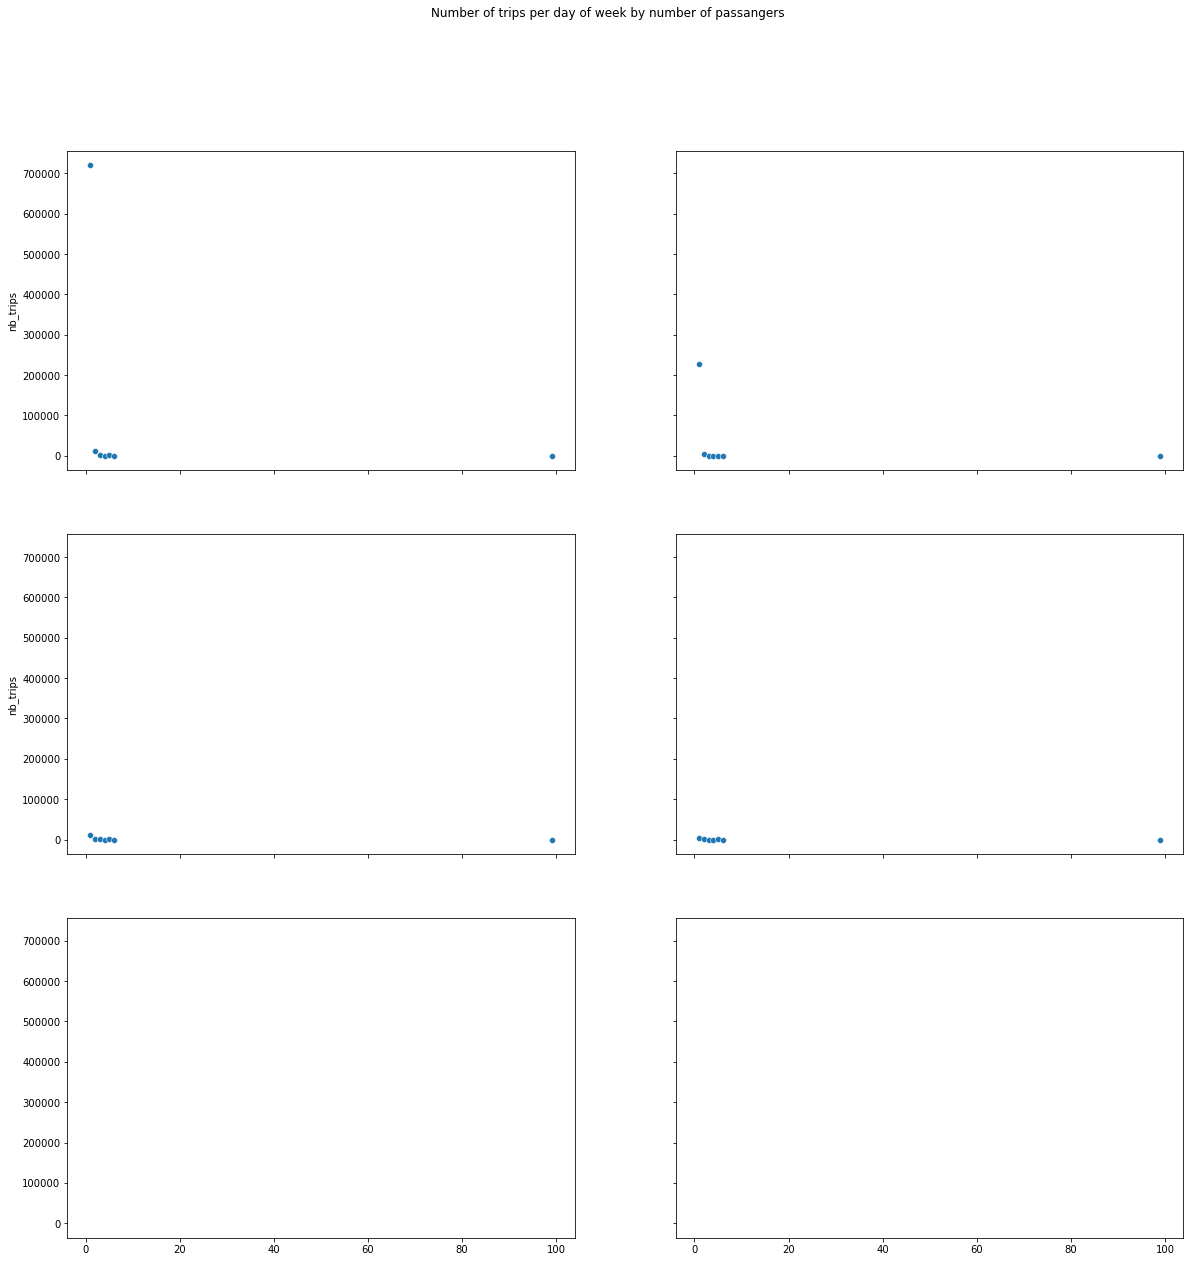

In [78]:
payment_type = [1.0, 2.0, 3.0, 4.0]

fig, axes = plt.subplots(nrows=len(payment_type)//2+1, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for payment in payment_type:
    sns.scatterplot(data = fare_type_vs_payment_type[fare_type_vs_payment_type['payment_type'] == payment],
                 x = 'RatecodeID', y = 'nb_trips', ax=axes[i//2, i%2],)
    i += 1
plt.show()

In [79]:
fare_type_vs_pass_count = march.groupby(['RatecodeID', 'passenger_count']).size().reset_index()
fare_type_vs_pass_count.columns=['RatecodeID','passenger_count','nb_trips']
fare_type_vs_pass_count_pivot = fare_type_vs_pass_count.pivot(index= 'RatecodeID', columns='passenger_count', values='nb_trips')
fare_type_vs_pass_count_pivot

passenger_count,0,1,2,3,4,5,6,8,9
RatecodeID,,,,,,,,,
1.0,61532,744073,121015,25466,11288,769,648,1,4
2.0,1108,10717,3863,641,339,23,24,0,0
3.0,146,1295,391,71,35,2,1,0,0
4.0,28,513,104,27,12,1,1,0,0
5.0,325,2824,653,151,76,24,5,0,0
6.0,3,8,1,0,0,0,0,0,0
99.0,16,2,1,0,0,0,0,0,0


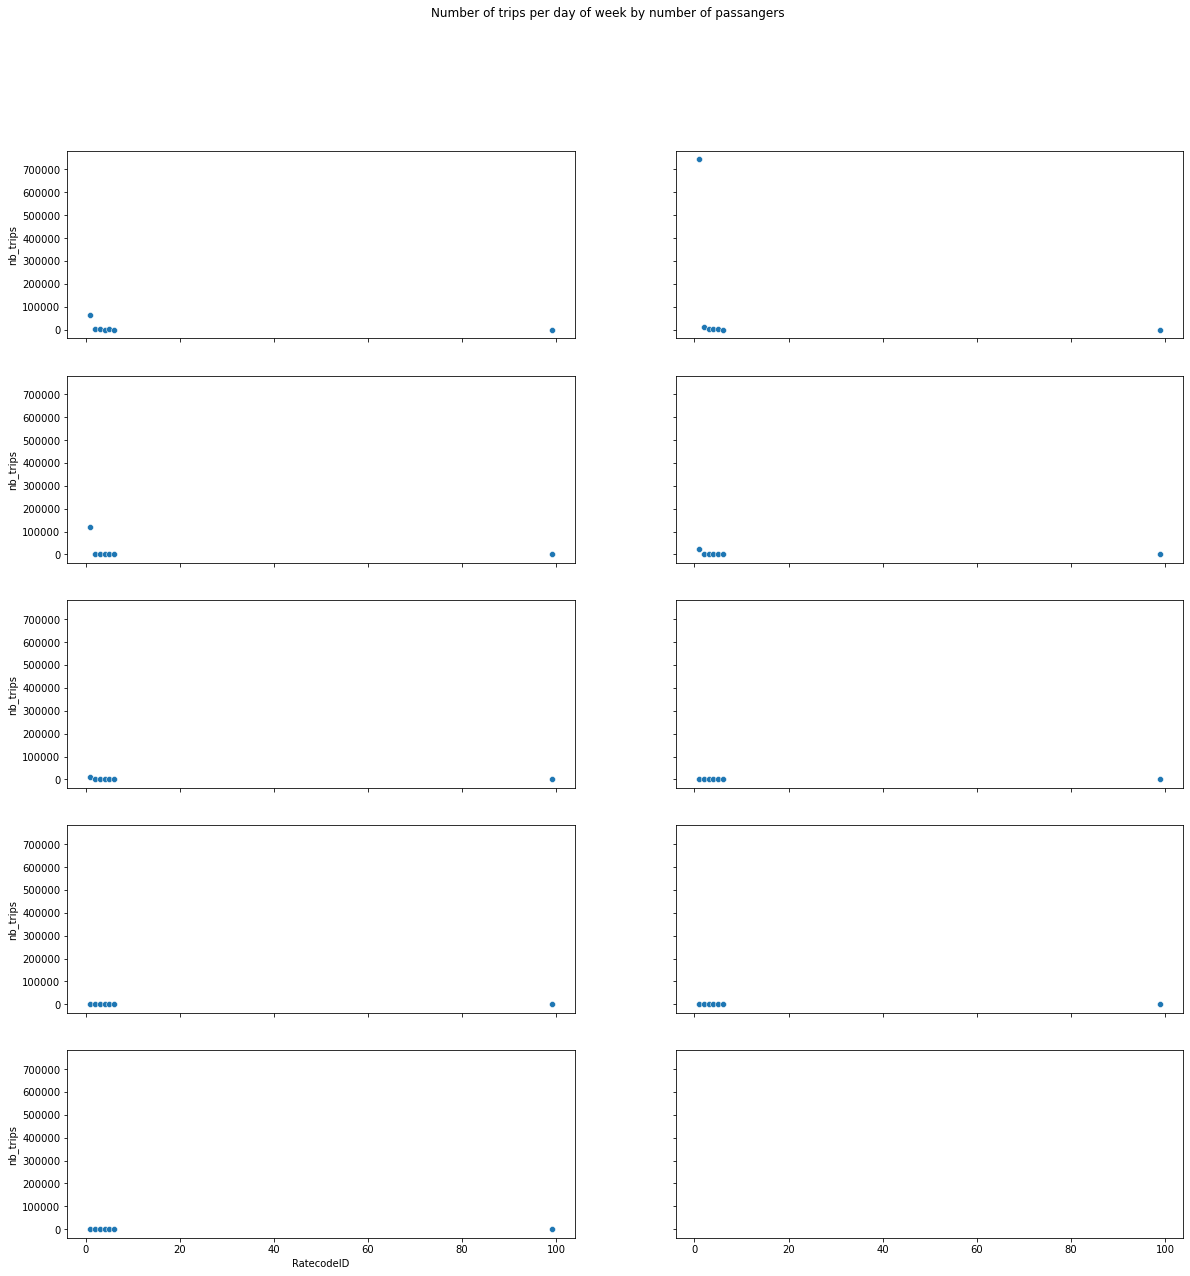

In [82]:
passenger_count = fare_type_vs_pass_count.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2+1, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.scatterplot(data = fare_type_vs_pass_count[fare_type_vs_pass_count['passenger_count'] == passenger],
                 x = 'RatecodeID', y = 'nb_trips', ax=axes[i//2, i%2],)
    i += 1
plt.show()

In [84]:
payment_type_vs_pass_count = march.groupby(['payment_type', 'passenger_count']).size().reset_index()
payment_type_vs_pass_count.columns=['payment_type','passenger_count','nb_trips']
payment_type_vs_pass_count_pivot = payment_type_vs_pass_count.pivot(index='payment_type', columns='passenger_count', values='nb_trips')
payment_type_vs_pass_count_pivot

passenger_count,0,1,2,3,4,5,6,8,9
payment_type,,,,,,,,,
1.0,46659,574122,90151,18360,7114,596,468,1,4
2.0,14961,171881,33839,7496,4403,204,173,0,0
3.0,1201,10154,1475,355,164,10,14,0,0
4.0,337,3275,563,145,69,9,24,0,0


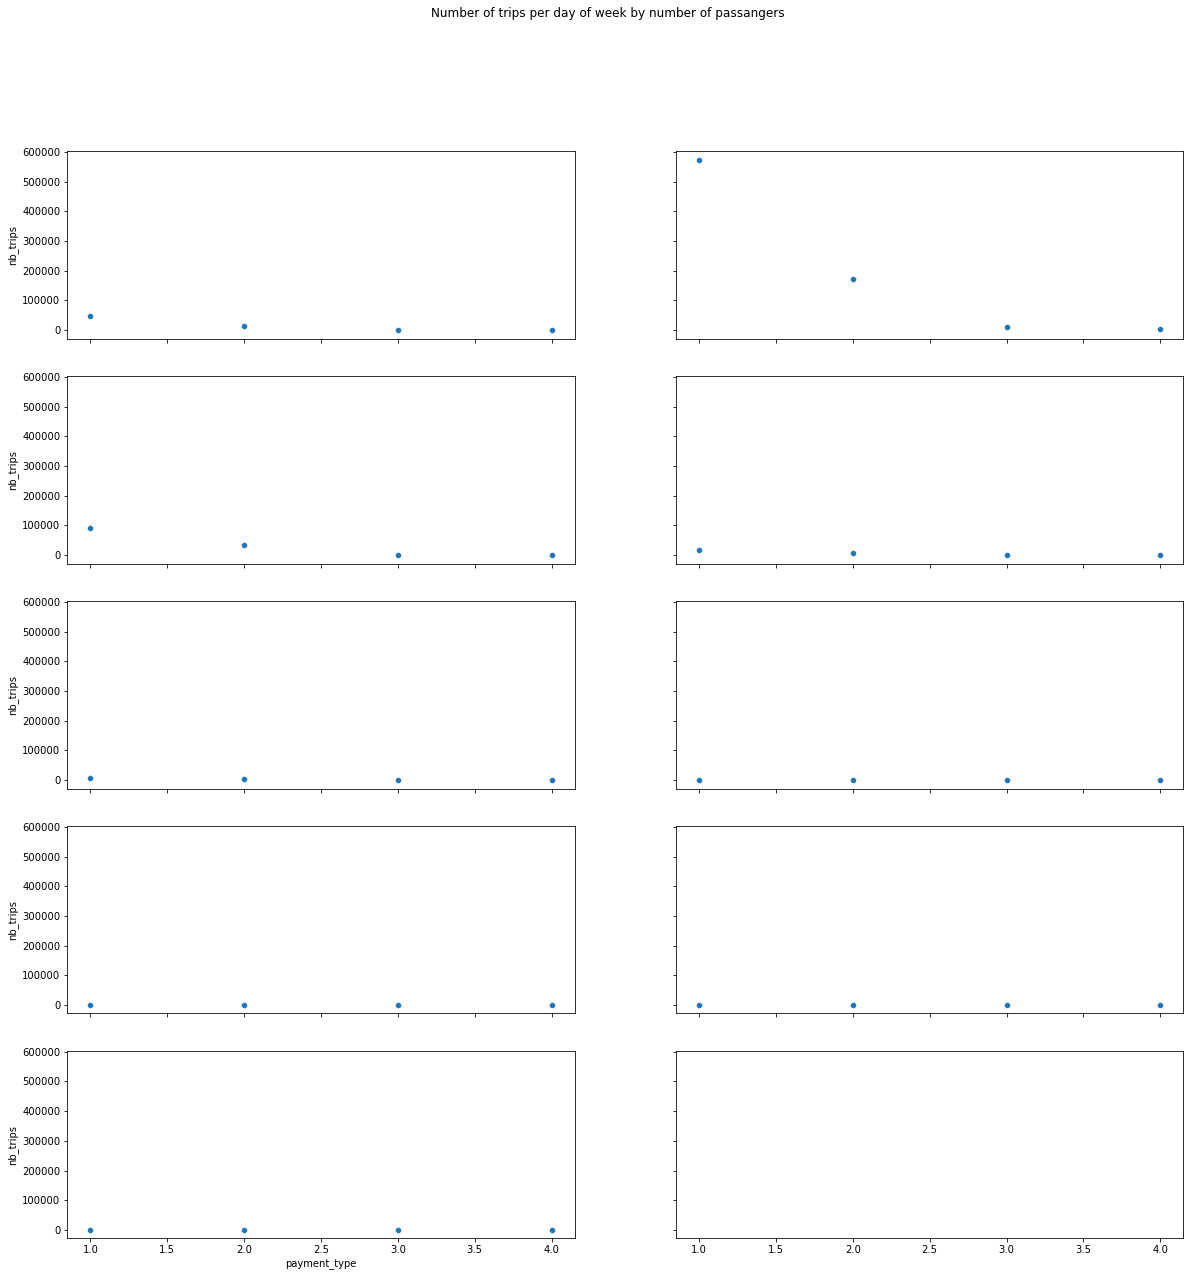

In [86]:
passenger_count = payment_type_vs_pass_count.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2+1, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.scatterplot(data = payment_type_vs_pass_count[payment_type_vs_pass_count['passenger_count'] == passenger],
                 x = 'payment_type', y = 'nb_trips', ax=axes[i//2, i%2],)
    i += 1
plt.show()

## API

In [27]:
import requests

Set the params for the API

In [49]:
city = "New York"
from_date = "2020-3-1"
to_date = "2020-5-31"

In [51]:
resp = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{}%20{}/{}/{}?unitGroup=metric&key=BA2ZMU7Z5G69FTJEAEVC328WT&include=obs%2Cstats%2Calerts".format(city.split(' ')[0], 
                                                                                            city.split(' ')[1], from_date, to_date))
type(resp)

requests.models.Response

In [52]:
resp.text

'{"queryCost":92,"latitude":40.7146,"longitude":-74.0071,"resolvedAddress":"New York, NY, United States","address":"New York","timezone":"America/New_York","tzoffset":-5.0,"days":[{"datetime":"2020-03-01","datetimeEpoch":1583038800,"tempmax":8.7,"tempmin":-2.9,"temp":2.4,"feelslikemax":8.0,"feelslikemin":-7.4,"feelslike":-0.4,"dew":-8.4,"humidity":46.32,"precip":0.0,"precipprob":null,"precipcover":0.0,"preciptype":null,"snow":0.0,"snowdepth":0.0,"windgust":64.8,"windspeed":22.0,"winddir":280.6,"pressure":1020.4,"cloudcover":4.6,"visibility":16.0,"solarradiation":null,"solarenergy":null,"sunrise":"06:29:07","sunriseEpoch":1583062147,"sunset":"17:47:57","sunsetEpoch":1583102877,"moonphase":0.18,"conditions":"Clear","icon":"clear-day","stations":["72505394728","72055399999","KLGA","KJRB","KNYC","72503014732"],"source":"obs","normal":{"tempmax":[-1.1,7.4,19.6],"tempmin":[-8.3,1.3,11.8],"feelslike":[-14.1,7.4,19.6],"precip":[0.0,2.9,12.1],"humidity":[25.7,58.1,90.7],"snowdepth":[11.3,11.3,1

Parsing the response string

In [53]:
import json

In [54]:
weather = json.loads(resp.text)
weather

{'queryCost': 92,
 'latitude': 40.7146,
 'longitude': -74.0071,
 'resolvedAddress': 'New York, NY, United States',
 'address': 'New York',
 'timezone': 'America/New_York',
 'tzoffset': -5.0,
 'days': [{'datetime': '2020-03-01',
   'datetimeEpoch': 1583038800,
   'tempmax': 8.7,
   'tempmin': -2.9,
   'temp': 2.4,
   'feelslikemax': 8.0,
   'feelslikemin': -7.4,
   'feelslike': -0.4,
   'dew': -8.4,
   'humidity': 46.32,
   'precip': 0.0,
   'precipprob': None,
   'precipcover': 0.0,
   'preciptype': None,
   'snow': 0.0,
   'snowdepth': 0.0,
   'windgust': 64.8,
   'windspeed': 22.0,
   'winddir': 280.6,
   'pressure': 1020.4,
   'cloudcover': 4.6,
   'visibility': 16.0,
   'solarradiation': None,
   'solarenergy': None,
   'sunrise': '06:29:07',
   'sunriseEpoch': 1583062147,
   'sunset': '17:47:57',
   'sunsetEpoch': 1583102877,
   'moonphase': 0.18,
   'conditions': 'Clear',
   'icon': 'clear-day',
   'stations': ['72505394728',
    '72055399999',
    'KLGA',
    'KJRB',
    'KNYC',

In [55]:
weather.keys()

dict_keys(['queryCost', 'latitude', 'longitude', 'resolvedAddress', 'address', 'timezone', 'tzoffset', 'days', 'stations'])

In [56]:
weather['days']

[{'datetime': '2020-03-01',
  'datetimeEpoch': 1583038800,
  'tempmax': 8.7,
  'tempmin': -2.9,
  'temp': 2.4,
  'feelslikemax': 8.0,
  'feelslikemin': -7.4,
  'feelslike': -0.4,
  'dew': -8.4,
  'humidity': 46.32,
  'precip': 0.0,
  'precipprob': None,
  'precipcover': 0.0,
  'preciptype': None,
  'snow': 0.0,
  'snowdepth': 0.0,
  'windgust': 64.8,
  'windspeed': 22.0,
  'winddir': 280.6,
  'pressure': 1020.4,
  'cloudcover': 4.6,
  'visibility': 16.0,
  'solarradiation': None,
  'solarenergy': None,
  'sunrise': '06:29:07',
  'sunriseEpoch': 1583062147,
  'sunset': '17:47:57',
  'sunsetEpoch': 1583102877,
  'moonphase': 0.18,
  'conditions': 'Clear',
  'icon': 'clear-day',
  'stations': ['72505394728',
   '72055399999',
   'KLGA',
   'KJRB',
   'KNYC',
   '72503014732'],
  'source': 'obs',
  'normal': {'tempmax': [-1.1, 7.4, 19.6],
   'tempmin': [-8.3, 1.3, 11.8],
   'feelslike': [-14.1, 7.4, 19.6],
   'precip': [0.0, 2.9, 12.1],
   'humidity': [25.7, 58.1, 90.7],
   'snowdepth': [1

Check if we actually got the data for all the days

In [ ]:
weather['days'][0]

In [58]:
weather['days'][-1]

{'datetime': '2020-05-31',
 'datetimeEpoch': 1590897600,
 'tzoffset': -4.0,
 'tempmax': 22.7,
 'tempmin': 14.3,
 'temp': 18.4,
 'feelslikemax': 22.7,
 'feelslikemin': 14.3,
 'feelslike': 18.6,
 'dew': 4.1,
 'humidity': 39.84,
 'precip': 0.0,
 'precipprob': None,
 'precipcover': 0.0,
 'preciptype': None,
 'snow': 0.0,
 'snowdepth': 0.0,
 'windgust': 53.1,
 'windspeed': 16.5,
 'winddir': 327.0,
 'pressure': 1018.0,
 'cloudcover': 7.7,
 'visibility': 16.0,
 'solarradiation': None,
 'solarenergy': None,
 'sunrise': '05:27:22',
 'sunriseEpoch': 1590917242,
 'sunset': '20:20:41',
 'sunsetEpoch': 1590970841,
 'moonphase': 0.33,
 'conditions': 'Clear',
 'icon': 'clear-day',
 'stations': ['72505394728',
  '72055399999',
  'KLGA',
  'KJRB',
  'KNYC',
  '72503014732'],
 'source': 'obs',
 'normal': {'tempmax': [17.9, 26.0, 33.0],
  'tempmin': [10.7, 17.5, 23.1],
  'feelslike': [10.7, 26.0, 32.5],
  'precip': [0.0, 4.0, 37.3],
  'humidity': [38.6, 65.7, 89.2],
  'snowdepth': [None, None, None],
  '

In [59]:
len(weather['days'])

92

Transform data to a dataframe

In [88]:
weather_df = pd.DataFrame(weather['days'])
weather_df

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunset,sunsetEpoch,moonphase,conditions,icon,stations,source,normal,hours,tzoffset
0,2020-03-01,1583038800,8.7,-2.9,2.4,8.0,-7.4,-0.4,-8.4,46.32,...,17:47:57,1583102877,0.18,Clear,clear-day,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-1.1, 7.4, 19.6], 'tempmin': [-8....",None,NaN
1,2020-03-02,1583125200,14.3,3.9,9.1,14.3,1.8,8.4,0.0,53.31,...,17:49:05,1583189345,0.23,Rain,rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-2.8, 7.5, 19.4], 'tempmin': [-8....",None,NaN
2,2020-03-03,1583211600,14.8,8.9,11.1,14.8,7.8,10.8,7.1,77.41,...,17:50:13,1583275813,0.28,Rain,rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-3.1, 6.4, 16.2], 'tempmin': [-11...",None,NaN
3,2020-03-04,1583298000,13.8,7.2,10.2,13.8,3.2,8.9,-0.2,50.65,...,17:51:20,1583362280,0.34,Rain,rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-2.1, 5.5, 17.2], 'tempmin': [-10...",None,NaN
4,2020-03-05,1583384400,12.1,4.3,7.6,12.1,2.3,6.5,-2.1,51.97,...,17:52:27,1583448747,0.38,Clear,clear-day,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [0.1, 6.3, 15.1], 'tempmin': [-8.6...",None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-05-27,1590552000,24.3,15.0,18.6,23.9,14.4,18.1,15.4,82.35,...,20:17:36,1590625056,0.11,Partially cloudy,partly-cloudy-day,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [18.2, 25.3, 30.1], 'tempmin': [10...",None,-4.0
88,2020-05-28,1590638400,23.9,16.8,20.1,24.3,15.0,18.6,17.8,86.89,...,20:18:24,1590711504,0.16,Partially cloudy,partly-cloudy-day,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [16.2, 24.0, 32.2], 'tempmin': [11...",None,-4.0
89,2020-05-29,1590724800,27.2,18.9,22.9,23.9,16.8,20.1,19.2,80.54,...,20:19:11,1590797951,0.21,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [15.3, 25.1, 31.2], 'tempmin': [10...",None,-4.0
90,2020-05-30,1590811200,28.3,19.4,23.5,28.5,18.9,23.1,13.8,58.76,...,20:19:57,1590884397,0.27,Rain,rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [15.1, 25.3, 31.9], 'tempmin': [10...",None,-4.0


In [89]:
weather_df.drop(['datetimeEpoch', 'solarradiation', 'solarenergy','sunriseEpoch','sunsetEpoch' ,'stations','source', 'normal', 'hours', 'tzoffset', 'icon'], axis='columns', inplace=True)
weather_df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windgust,windspeed,winddir,pressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions
0,2020-03-01,8.7,-2.9,2.4,8.0,-7.4,-0.4,-8.4,46.32,0.00,...,64.8,22.0,280.6,1020.4,4.6,16.0,06:29:07,17:47:57,0.18,Clear
1,2020-03-02,14.3,3.9,9.1,14.3,1.8,8.4,0.0,53.31,0.24,...,61.3,23.4,239.9,1014.9,14.5,16.0,06:27:35,17:49:05,0.23,Rain
2,2020-03-03,14.8,8.9,11.1,14.8,7.8,10.8,7.1,77.41,7.93,...,85.0,14.7,213.8,1004.4,23.4,14.3,06:26:01,17:50:13,0.28,Rain
3,2020-03-04,13.8,7.2,10.2,13.8,3.2,8.9,-0.2,50.65,0.97,...,79.8,39.6,270.9,1007.2,7.1,16.0,06:24:28,17:51:20,0.34,Rain
4,2020-03-05,12.1,4.3,7.6,12.1,2.3,6.5,-2.1,51.97,0.00,...,73.8,14.1,254.4,1018.8,1.9,16.0,06:22:53,17:52:27,0.38,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-05-27,24.3,15.0,18.6,23.9,14.4,18.1,15.4,82.35,0.00,...,NaN,16.7,137.6,1023.7,31.4,13.8,05:29:25,20:17:36,0.11,Partially cloudy
88,2020-05-28,23.9,16.8,20.1,24.3,15.0,18.6,17.8,86.89,0.00,...,49.5,20.6,127.5,1021.3,44.2,14.7,05:28:51,20:18:24,0.16,Partially cloudy
89,2020-05-29,27.2,18.9,22.9,23.9,16.8,20.1,19.2,80.54,0.25,...,42.5,18.4,142.2,1015.3,38.1,15.5,05:28:19,20:19:11,0.21,"Rain, Partially cloudy"
90,2020-05-30,28.3,19.4,23.5,28.5,18.9,23.1,13.8,58.76,0.02,...,50.0,18.4,254.7,1012.0,18.2,15.9,05:27:50,20:19:57,0.27,Rain


In [91]:
weather_df.dtypes

datetime         object
tempmax         float64
tempmin         float64
temp            float64
feelslikemax    float64
feelslikemin    float64
feelslike       float64
dew             float64
humidity        float64
precip          float64
precipprob       object
precipcover     float64
preciptype       object
snow            float64
snowdepth       float64
windgust        float64
windspeed       float64
winddir         float64
pressure        float64
cloudcover      float64
visibility      float64
sunrise          object
sunset           object
moonphase       float64
conditions       object
dtype: object

In [92]:
weather_df.drop(['precipprob', 'preciptype', 'precipcover', 'windgust', 'winddir'], axis='columns', inplace=True)
weather_df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,snow,snowdepth,windspeed,pressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions
0,2020-03-01,8.7,-2.9,2.4,8.0,-7.4,-0.4,-8.4,46.32,0.00,0.0,0.0,22.0,1020.4,4.6,16.0,06:29:07,17:47:57,0.18,Clear
1,2020-03-02,14.3,3.9,9.1,14.3,1.8,8.4,0.0,53.31,0.24,0.0,0.0,23.4,1014.9,14.5,16.0,06:27:35,17:49:05,0.23,Rain
2,2020-03-03,14.8,8.9,11.1,14.8,7.8,10.8,7.1,77.41,7.93,0.0,0.0,14.7,1004.4,23.4,14.3,06:26:01,17:50:13,0.28,Rain
3,2020-03-04,13.8,7.2,10.2,13.8,3.2,8.9,-0.2,50.65,0.97,0.0,0.0,39.6,1007.2,7.1,16.0,06:24:28,17:51:20,0.34,Rain
4,2020-03-05,12.1,4.3,7.6,12.1,2.3,6.5,-2.1,51.97,0.00,0.0,0.0,14.1,1018.8,1.9,16.0,06:22:53,17:52:27,0.38,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-05-27,24.3,15.0,18.6,23.9,14.4,18.1,15.4,82.35,0.00,0.0,0.0,16.7,1023.7,31.4,13.8,05:29:25,20:17:36,0.11,Partially cloudy
88,2020-05-28,23.9,16.8,20.1,24.3,15.0,18.6,17.8,86.89,0.00,0.0,0.0,20.6,1021.3,44.2,14.7,05:28:51,20:18:24,0.16,Partially cloudy
89,2020-05-29,27.2,18.9,22.9,23.9,16.8,20.1,19.2,80.54,0.25,0.0,0.0,18.4,1015.3,38.1,15.5,05:28:19,20:19:11,0.21,"Rain, Partially cloudy"
90,2020-05-30,28.3,19.4,23.5,28.5,18.9,23.1,13.8,58.76,0.02,0.0,0.0,18.4,1012.0,18.2,15.9,05:27:50,20:19:57,0.27,Rain


Change datetime to datetime format for the merge

In [93]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], format='%Y-%m-%d')

In [94]:
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'], format='%H:%M:%S')
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'], format='%H:%M:%S')

In [95]:
weather_df.dtypes

datetime        datetime64[ns]
tempmax                float64
tempmin                float64
temp                   float64
feelslikemax           float64
feelslikemin           float64
feelslike              float64
dew                    float64
humidity               float64
precip                 float64
snow                   float64
snowdepth              float64
windspeed              float64
pressure               float64
cloudcover             float64
visibility             float64
sunrise         datetime64[ns]
sunset          datetime64[ns]
moonphase              float64
conditions              object
dtype: object

In [96]:
weather_df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,snow,snowdepth,windspeed,pressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions
0,2020-03-01,8.7,-2.9,2.4,8.0,-7.4,-0.4,-8.4,46.32,0.00,0.0,0.0,22.0,1020.4,4.6,16.0,1900-01-01 06:29:07,1900-01-01 17:47:57,0.18,Clear
1,2020-03-02,14.3,3.9,9.1,14.3,1.8,8.4,0.0,53.31,0.24,0.0,0.0,23.4,1014.9,14.5,16.0,1900-01-01 06:27:35,1900-01-01 17:49:05,0.23,Rain
2,2020-03-03,14.8,8.9,11.1,14.8,7.8,10.8,7.1,77.41,7.93,0.0,0.0,14.7,1004.4,23.4,14.3,1900-01-01 06:26:01,1900-01-01 17:50:13,0.28,Rain
3,2020-03-04,13.8,7.2,10.2,13.8,3.2,8.9,-0.2,50.65,0.97,0.0,0.0,39.6,1007.2,7.1,16.0,1900-01-01 06:24:28,1900-01-01 17:51:20,0.34,Rain
4,2020-03-05,12.1,4.3,7.6,12.1,2.3,6.5,-2.1,51.97,0.00,0.0,0.0,14.1,1018.8,1.9,16.0,1900-01-01 06:22:53,1900-01-01 17:52:27,0.38,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-05-27,24.3,15.0,18.6,23.9,14.4,18.1,15.4,82.35,0.00,0.0,0.0,16.7,1023.7,31.4,13.8,1900-01-01 05:29:25,1900-01-01 20:17:36,0.11,Partially cloudy
88,2020-05-28,23.9,16.8,20.1,24.3,15.0,18.6,17.8,86.89,0.00,0.0,0.0,20.6,1021.3,44.2,14.7,1900-01-01 05:28:51,1900-01-01 20:18:24,0.16,Partially cloudy
89,2020-05-29,27.2,18.9,22.9,23.9,16.8,20.1,19.2,80.54,0.25,0.0,0.0,18.4,1015.3,38.1,15.5,1900-01-01 05:28:19,1900-01-01 20:19:11,0.21,"Rain, Partially cloudy"
90,2020-05-30,28.3,19.4,23.5,28.5,18.9,23.1,13.8,58.76,0.02,0.0,0.0,18.4,1012.0,18.2,15.9,1900-01-01 05:27:50,1900-01-01 20:19:57,0.27,Rain


Export the data to csv

In [101]:
weather_df.to_csv("C:/Users/MViki/Documents/CEU/Winter_semester/Coding_3/Term_project/Python_Final_Project/Data/Weather_data.csv")